In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

# import sklearn
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs, fetch_openml
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords

# import gensim models
import gensim
from gensim import corpora, models, similarities, matutils
from gensim.utils import simple_preprocess

# import visualization tools
import umap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import spacy

plt.style.use("seaborn")
%matplotlib inline

In [3]:
# function to show topic and topic words from models
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [4]:
ldana = pd.read_pickle('ldana.pkl')
corpusna = pd.read_pickle('corpusna.pkl')

In [5]:
data_na = pd.read_pickle('data_na.pkl')

In [6]:
data_na['reviews'].str.len().sort_values()

Laurel Canyon Trail, Wildcat Peak, Sylvan, Jewel Lake Trails                   16
PCT: CA Section O - Burney Falls State Park to Highway 5 (Castle Crags)        19
Mount Baldy Notch Via Icehouse Canyon Trail and 3 Ts                           36
Wildwood Mountain Trail                                                        55
Cypress Grove Trail via South Shore Trail                                      66
                                                                            ...  
Mount Tallac Trail                                                          75584
Mount San Antonio and Mount Baldy Notch Trail                               75776
Upper Yosemite Falls Trail                                                  76100
Half Dome Trail                                                            104266
Mount Whitney Trail                                                        123818
Name: reviews, Length: 1013, dtype: int64

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['top','good','time','falls'])

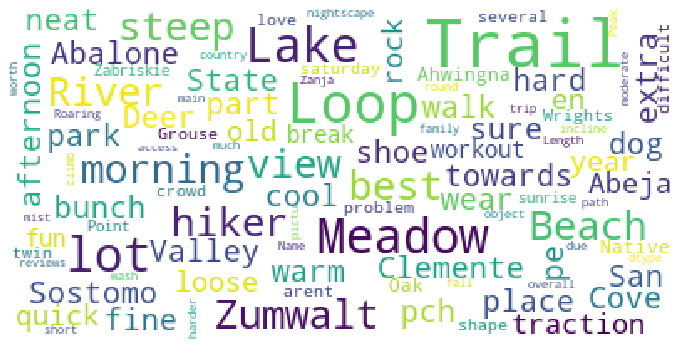

In [92]:
plt.rcParams['figure.figsize']=(12.0,12.0)  
plt.rcParams['font.size']=12            
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
stopwords = stop_words

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data_na.reviews))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

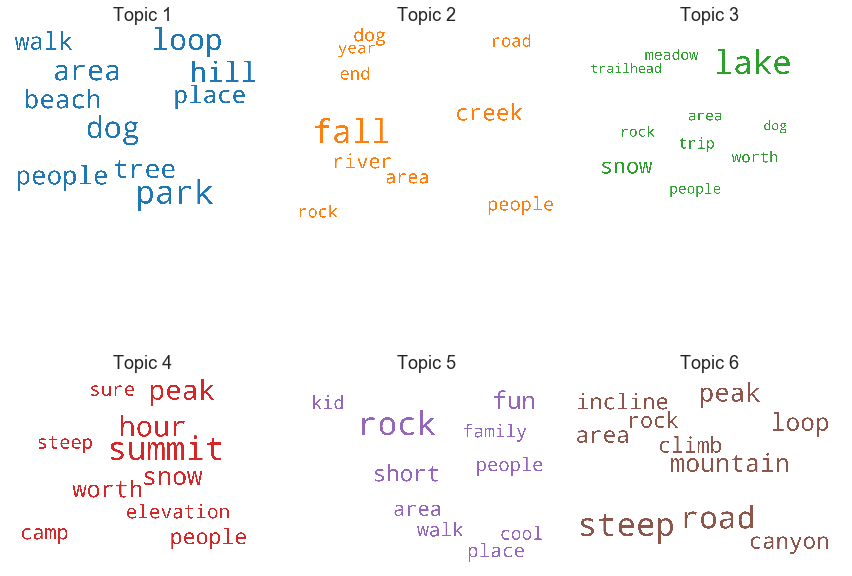

In [93]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = g_lda_cv.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=18))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('lda_wordclouds.svg')
plt.show()


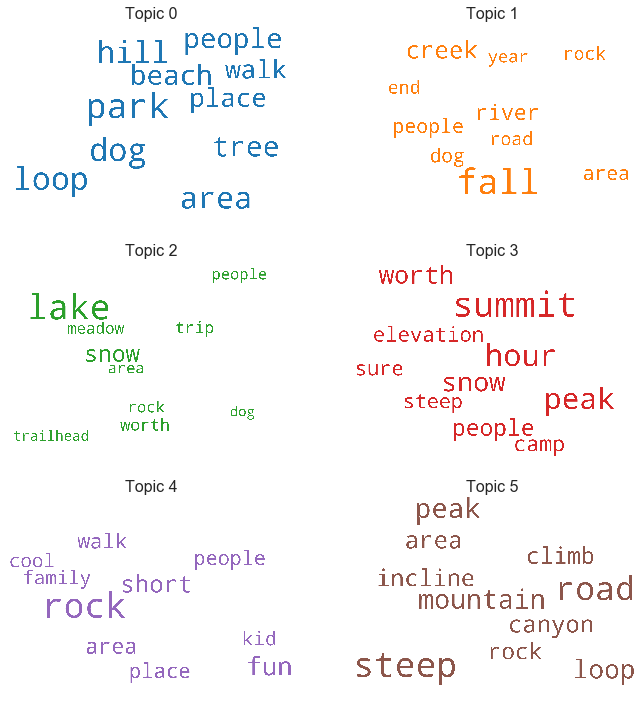

In [21]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = g_lda_cv.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## CV & LDA

In [9]:
spacy_nlp = spacy.load('en_core_web_sm')
spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)

In [98]:
customize_stop_words = [
    'trail', 'hike','great','get','go','im','way','back','beautiful','lot','trails','view','mile','water',
    'easy','nice','half_dome','good','time','top','little','так','по','как','ça','zumwalt','waterfall','baldy','yosemite'
]
spacy_stopwords.extend(customize_stop_words)

In [99]:
cvna = CountVectorizer(stop_words=spacy_stopwords, min_df = .03, max_df=0.95)
data_cvna = cvna.fit_transform(data_na.reviews)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_na.index

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
corpus_cv = matutils.Sparse2Corpus(data_cvna.transpose())
id2word_cv = dict((v, k) for k, v in cvna.vocabulary_.items())

In [100]:
from sklearn.decomposition import LatentDirichletAllocation
sk_lda_cv = LatentDirichletAllocation(n_components=6,max_iter=50)
doc_topic_lda_cv = sk_lda_cv.fit_transform(data_cvna)

In [13]:
# topics with gensim LDA
g_lda_cv = models.LdaModel(corpus=corpus_cv, num_topics=6, id2word=id2word_cv, passes=20)
g_lda_cv.print_topics()

[(0,
  '0.016*"park" + 0.013*"dog" + 0.013*"loop" + 0.012*"area" + 0.012*"hill" + 0.010*"tree" + 0.010*"people" + 0.010*"beach" + 0.009*"place" + 0.009*"walk"'),
 (1,
  '0.042*"fall" + 0.016*"creek" + 0.013*"river" + 0.011*"people" + 0.011*"area" + 0.010*"dog" + 0.009*"end" + 0.009*"road" + 0.009*"rock" + 0.008*"year"'),
 (2,
  '0.062*"lake" + 0.021*"snow" + 0.009*"worth" + 0.009*"trip" + 0.008*"meadow" + 0.008*"area" + 0.008*"people" + 0.008*"rock" + 0.006*"trailhead" + 0.006*"dog"'),
 (3,
  '0.021*"summit" + 0.016*"hour" + 0.015*"peak" + 0.012*"snow" + 0.010*"worth" + 0.009*"people" + 0.008*"camp" + 0.007*"elevation" + 0.007*"sure" + 0.007*"steep"'),
 (4,
  '0.036*"rock" + 0.017*"fun" + 0.015*"short" + 0.012*"area" + 0.011*"walk" + 0.011*"place" + 0.011*"people" + 0.010*"kid" + 0.010*"cool" + 0.010*"family"'),
 (5,
  '0.019*"steep" + 0.018*"road" + 0.011*"peak" + 0.011*"mountain" + 0.010*"loop" + 0.009*"area" + 0.009*"canyon" + 0.008*"incline" + 0.008*"climb" + 0.008*"rock"')]

In [114]:
# topics with sklearn LDA
topic_word = pd.DataFrame(sk_lda_cv.components_.round(5),
             columns = cvna.get_feature_names())
display_topics(sk_lda_cv, cvna.get_feature_names(), 15)


Topic  0
fall, rock, creek, river, end, worth, people, area, road, year, stream, fun, bit, right, spot

Topic  1
beach, tree, rock, park, canyon, short, loop, redwood, walk, ocean, worth, area, point, fun, end

Topic  2
lake, snow, meadow, trip, rock, worth, area, trailhead, people, night, dog, gorgeous, pas, year, spot

Topic  3
summit, hour, snow, peak, people, worth, camp, switchbacks, elevation, sure, early, pole, dont, hiker, ice

Topic  4
steep, road, peak, climb, mountain, rock, loop, incline, area, worth, hour, hard, fire, moderate, sure

Topic  5
dog, park, area, people, hill, place, loop, walk, fun, kid, path, shade, mountain, family, morning


In [266]:
# topics with sklearn LDA
topic_word = pd.DataFrame(sk_lda_cv.components_.round(3),
             columns = cvna.get_feature_names())
display_topics(sk_lda_cv, cvna.get_feature_names(), 30)


Topic  0
summit, hour, peak, snow, worth, people, camp, switchbacks, sure, elevation, pole, early, dont, hiker, steep, trip, mountain, point, bring, climb, valley, difficult, foot, ice, mt, hard, didnt, start, tough, break

Topic  1
fall, creek, river, tree, stream, area, end, people, dog, year, redwood, forest, loop, bridge, small, spot, early, road, place, bug, park, poison, bit, hot, plenty, cross, worth, scenery, oak, rain

Topic  2
rock, fun, road, short, worth, canyon, people, area, cool, end, climb, place, rocky, kid, point, fall, dont, right, drive, sure, bit, awesome, spot, old, walk, shoe, difficult, year, boulder, family

Topic  3
steep, road, loop, mountain, peak, incline, area, climb, hill, moderate, shade, hour, uphill, hot, hard, fire, dog, people, bit, bring, sure, worth, workout, right, sign, clockwise, ridge, start, difficult, hiker

Topic  4
park, dog, beach, walk, place, area, people, kid, loop, family, hill, fun, path, ocean, flat, short, horse, old, spot, busy, s

In [31]:
df_lda_cv = pd.DataFrame(doc_topic_lda_cv,
             index = data_na.index,
             columns = ["topic_1","topic_2","topic_3","topic_4",
                       "topic_5","topic_6"])
df_lda_cv.head(20)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
San Clemente State Beach,0.016732,0.001399,0.376388,0.001399,0.602682,0.001400
Sostomo and Deer Valley Loop Trail,0.000254,0.733161,0.043761,0.000254,0.171032,0.051538
Abalone Cove Trail,0.000222,0.000222,0.392668,0.000222,0.163983,0.442682
Abeja Loop Trail,0.013848,0.750046,0.006227,0.000389,0.229101,0.000389
Ahwingna and Native Oak Loop Trail,0.000128,0.524869,0.000128,0.010950,0.462106,0.001820
Alamere Falls and Wildcat Camp via Bear Valley Trail,0.000552,0.000552,0.260464,0.238223,0.150287,0.349922
Alamere Falls via Coast Trail from Palomarin Trailhead,0.038837,0.110071,0.222246,0.000095,0.000095,0.628656
Aliso Creek and Wood Canyon Loop Trail,0.000218,0.357817,0.115616,0.012127,0.452754,0.061467
Aliso Summit Trail,0.000361,0.253814,0.176639,0.078384,0.490441,0.000361
Almaden Quicksilver County Park Mountain Bike Trail,0.000733,0.473235,0.051515,0.000731,0.440516,0.033269


In [33]:
# pickle.dump(df_lda_cv, open("df_lda_cv.pkl", "wb"))

## TF IDF & LSA

In [69]:
vectorizer = TfidfVectorizer(min_df=.03,max_df=0.95, ngram_range=(1, 2), stop_words="english")
doc_term_matrix = vectorizer.fit_transform(data_na.reviews)
corpus = matutils.Sparse2Corpus(doc_term_matrix.transpose())

In [71]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=7)
doc_topic_svd = svd.fit_transform(doc_term_matrix)

In [274]:
feature_names = vectorizer.get_feature_names()

for i in range(7):
    component = svd.components_[i]
    features = [(ind, x) for ind, x in enumerate(component)]
    top_features = sorted(features, key=lambda x:x[1], reverse=True)[:10]
    top_words = [feature_names[x[0]] for x in top_features]
    print ("\n Topic %d: " %(i))
    print (",".join(top_words))


 Topic 0: 
lake,day,dog,rock,lot,steep,road,mile,fall,area

 Topic 1: 
lake,snow,mosquito,night,meadow,granite,camp,pas,tahoe,trip

 Topic 2: 
fall,waterfall,creek,river,pool,stream,waterfall end,rock,wet,camp

 Topic 3: 
beach,lake,ocean,walk,dog,bridge,coastal,coast,cliff,redwood

 Topic 4: 
beach,peak,summit,ocean,fall,snow,rock,worth,coast,camp

 Topic 5: 
redwood,tree,creek,sequoia,meadow,forest,fern,loop,grove,camp

 Topic 6: 
rock,formation,canyon,river,rock formation,sequoia,tree,fun,boulder,meadow


In [69]:
print('Explained Variance Ratio per topic:\n',svd.explained_variance_ratio_)

Explained Variance Ratio per topic:
 [0.01344799 0.03233774 0.02274925 0.01791352 0.01482899 0.01179143
 0.00972662]


In [96]:
H = pd.DataFrame(doc_topic_svd.round(5),
             index = data_na.index,
             columns = ["topic_1","topic_2","topic_3","topic_4",
                       "topic_5","topic_6","topic_7"])
H.head(20)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
San Clemente State Beach,0.23261,-0.14433,-0.17369,0.57747,0.33444,-0.04518,-0.07172
Sostomo and Deer Valley Loop Trail,0.47982,-0.16111,-0.01866,0.01674,-0.04578,0.03111,-0.03962
Abalone Cove Trail,0.35587,-0.12847,-0.10281,0.41709,0.30638,-0.14957,0.10923
Abeja Loop Trail,0.47144,-0.11447,-0.15889,-0.02215,-0.07620,-0.14303,-0.07001
Ahwingna and Native Oak Loop Trail,0.56341,-0.17523,-0.15552,-0.02791,-0.19488,-0.06309,-0.12347
Alamere Falls and Wildcat Camp via Bear Valley Trail,0.42673,-0.08616,0.12499,0.19436,0.29847,-0.00883,0.04351
Alamere Falls via Coast Trail from Palomarin Trailhead,0.52985,-0.10347,0.33951,0.30373,0.37253,-0.11841,-0.12585
Aliso Creek and Wood Canyon Loop Trail,0.51595,-0.16784,-0.11524,0.07964,-0.10937,-0.00132,0.07635
Aliso Summit Trail,0.42549,-0.14692,-0.18141,0.13672,0.08591,-0.05560,-0.05099
Almaden Quicksilver County Park Mountain Bike Trail,0.38554,-0.11908,-0.10765,-0.00830,-0.15420,0.00535,-0.06412


## CV & LSA

In [19]:
cv = CountVectorizer(stop_words="english")
data_cv = cv.fit_transform(data_na.reviews)

In [25]:
svd_cv = TruncatedSVD(n_components=7)
doc_top_svd_cv = svd_cv.fit_transform(data_cv)

In [275]:
feature_names_cv = cv.get_feature_names()
cv.get_feature_names()
for i in range(7):
    component = svd_cv.components_[i]
    features = [(ind, x) for ind, x in enumerate(component)]
    top_features = sorted(features, key=lambda x:x[1], reverse=True)[:10]
    top_words = [feature_names_cv[x[0]] for x in top_features]
    print ("\n Topic %d: " %(i))
    print (", ".join(top_words))


 Topic 0: 
view, day, fall, mile, people, hour, summit, rock, worth, lot

 Topic 1: 
summit, day, camp, snow, lake, whitney, hour, switchbacks, peak, night

 Topic 2: 
cable, fall, permit, mist, day, waterfall, glove, dome, subdome, people

 Topic 3: 
view, cable, lake, worth, dome, yosemite, mist, valley, point, subdome

 Topic 4: 
peak, backbone, ski, baldy, view, steep, devil, summit, hut, road

 Topic 5: 
fall, view, worth, snow, yosemite, switchbacks, point, waterfall, hour, valley

 Topic 6: 
backbone, lake, ski, baldy, devil, hut, bowl, lift, fall, cable


In [38]:
print('Explained Variance Ratio per topic:\n',svd_cv.explained_variance_ratio_)

Explained Variance Ratio per topic:
 [0.34554061 0.08856286 0.06051364 0.04755292 0.04648982 0.02936817
 0.03044318]


### KMEANS

In [6]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

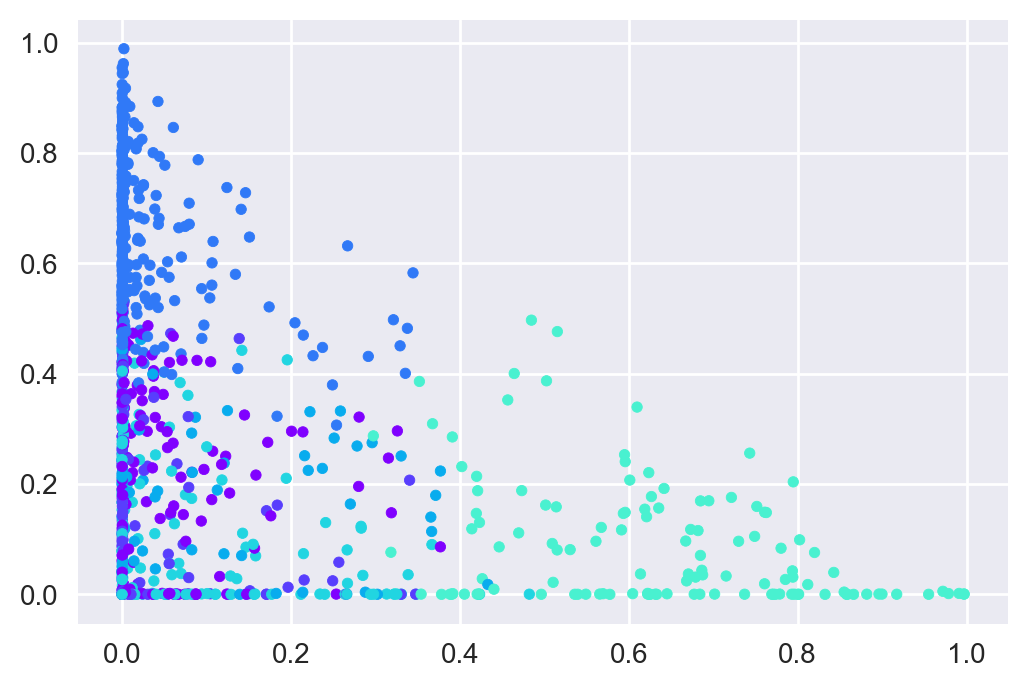

In [24]:
from sklearn.cluster import KMeans

# result = svd.fit_transform(doc_term_matrix)
km = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1)
km.fit(doc_topic_lda_cv)
ypred = km.fit_predict(doc_topic_lda_cv)
x = doc_topic_lda_cv[:, 0]
y = doc_topic_lda_cv[:, 1]
plt.figure(dpi=200)
plt.scatter(doc_topic_lda_cv[:,0],doc_topic_lda_cv[:,1],c=plt.cm.rainbow(ypred*20),s=14);

In [117]:
km_model = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=15)
km_model.fit(data_cvna)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [118]:
# Top terms in each clusters.
print("Top terms per cluster:")
order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = cvna.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 area
 road
 steep
 lake
 rock
 dog
 people
 loop
 park
 worth
Cluster 1:
 fall
 rock
 people
 lake
 area
 worth
 dog
 steep
 road
 fun
Cluster 2:
 summit
 hour
 snow
 worth
 people
 fall
 peak
 camp
 sure
 rock


Text(0, 0.5, 'SSE')

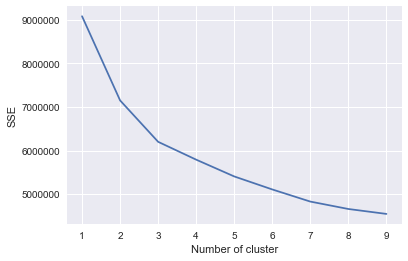

In [78]:
# data-structure to store Sum-Of-Square-Errors
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=50).fit(data_cvna)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [72]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(doc_topic_svd)

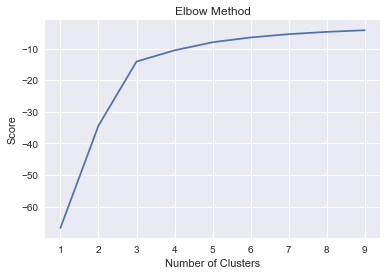

In [74]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
# test_e = kmeans(3, 1, 600)
# fitted = test_e.fit_kmeans(Y_sklearn)
# predicted_values = test_e.predict(Y_sklearn)

# plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids
# plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

### Agglomerative Clustering

ward : 0.03s
average : 0.02s
complete : 0.02s


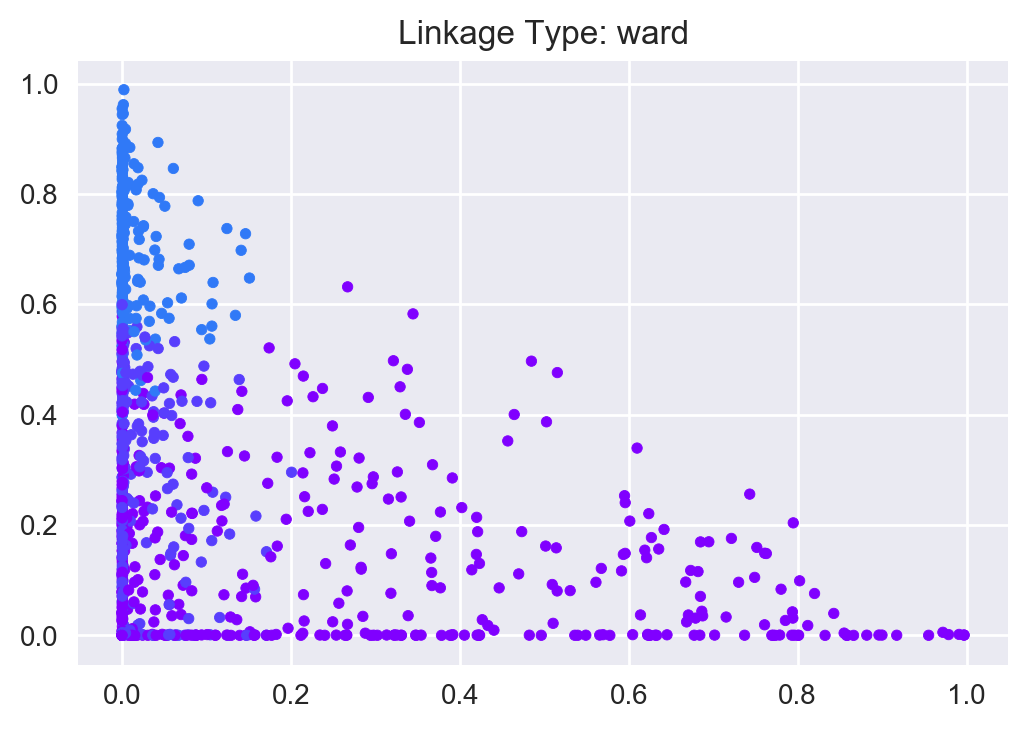

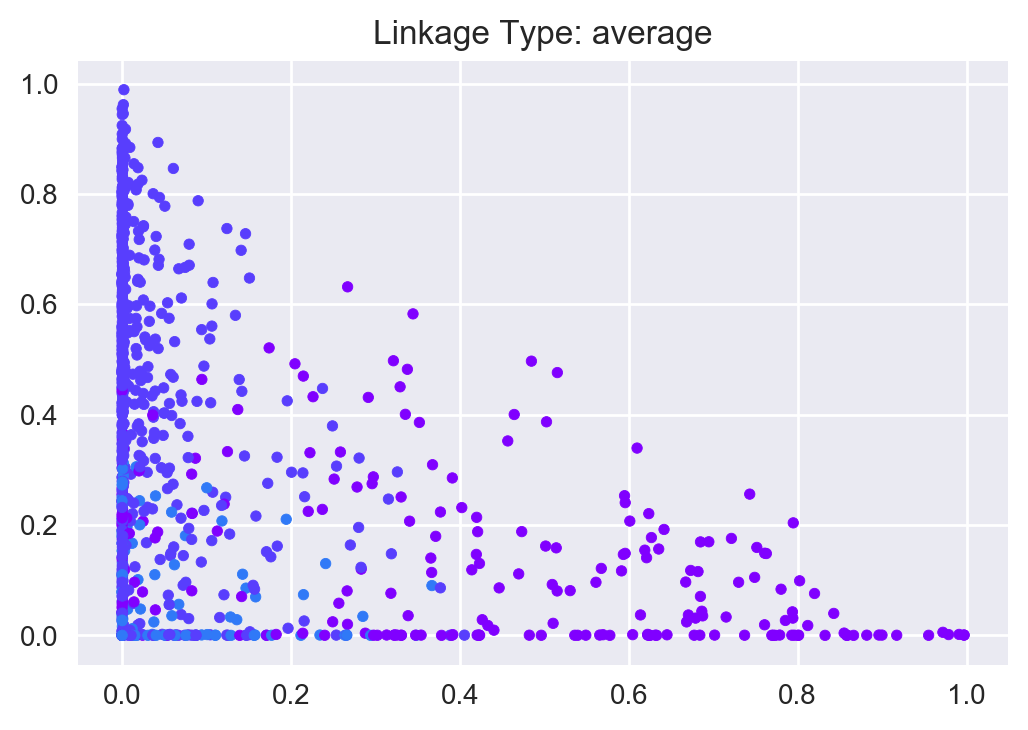

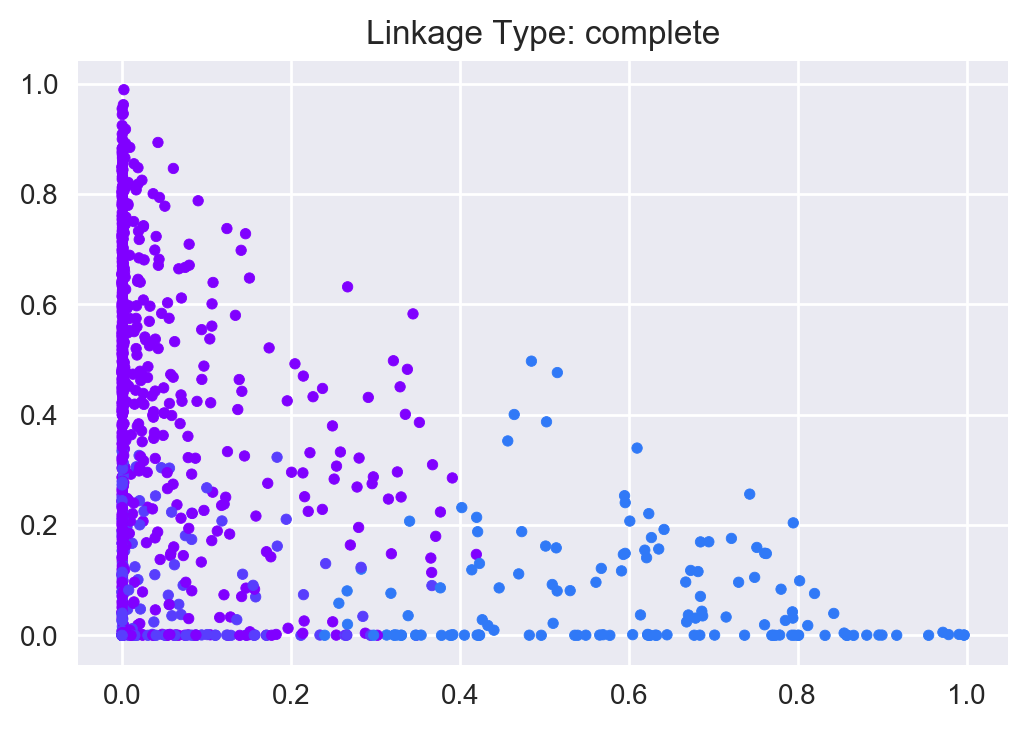

In [29]:
from time import time
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(doc_topic_lda_cv)
    print("%s : %.2fs" % (linkage, time() - t0))
    
    x = doc_topic_lda_cv[:, 0]
    y = doc_topic_lda_cv[:, 1]
    plt.figure(dpi=200)
    plt.scatter(x,y,c=plt.cm.rainbow(clustering.labels_*20),s=14)
    plt.title("Linkage Type: %s" % linkage)

### UMAP

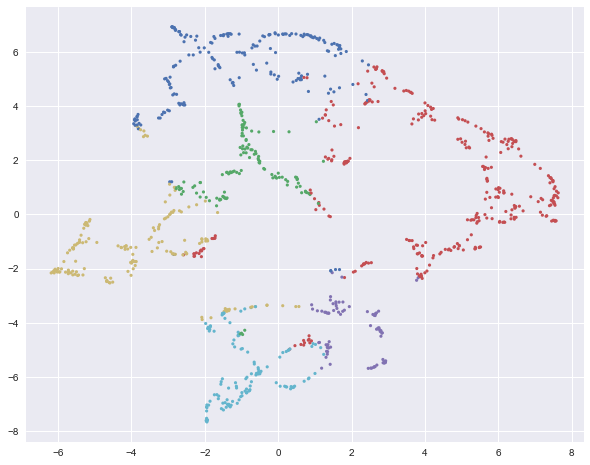

In [26]:
embedding = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=12).fit_transform(doc_topic_lda_cv)

plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = [sns.color_palette()[x] for x in ypred],
s = 10, # size
edgecolor='none'
)
plt.savefig('umap_clusters.svg')
plt.show()

### Mean Shift Clustering

In [86]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(doc_topic_lda_cv, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(doc_topic_lda_cv)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


<Figure size 432x288 with 0 Axes>

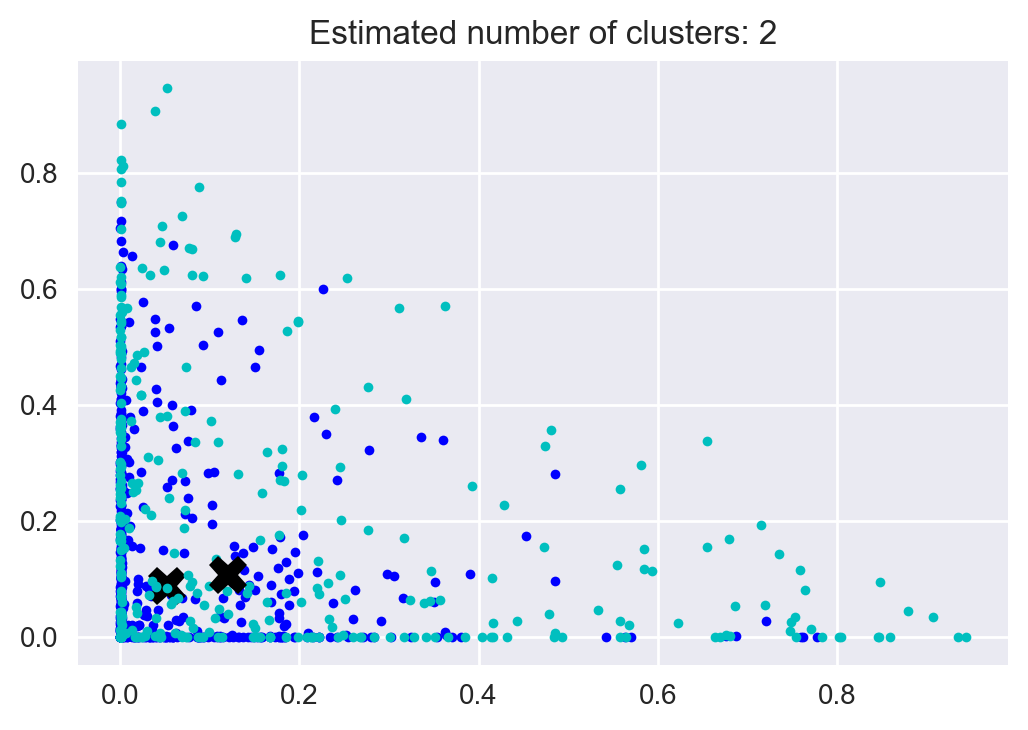

In [272]:
from itertools import cycle

plt.figure(1)
plt.clf()
plt.figure(dpi=200)
colors = cycle('bcmgkr')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(doc_topic_lda_cv[my_members, 0], doc_topic_lda_cv[my_members, 1] ,  col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='k',
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_);

## LDA vis

In [170]:
import pyLDAvis
import pyLDAvis.sklearn
# pre - filtering more stop words like baldy
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_cv, data_cvna, cvna, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  28.607756
0      54.854797 -36.476795       2        1  16.976582
5      32.212929 -61.444572       3        1  15.126423
4       5.111096 -14.110332       4        1  14.177080
2      26.350170 -33.374702       5        1  13.550524
1      38.109818  -7.222781       6        1  11.561636, topic_info=          Term         Freq        Total Category  logprob  loglift
934       lake  6544.000000  6544.000000  Default  30.0000  30.0000
591       fall  6820.000000  6820.000000  Default  29.0000  29.0000
1712    summit  3641.000000  3641.000000  Default  28.0000  28.0000
1610      snow  4063.000000  4063.000000  Default  27.0000  27.0000
482        dog  5891.000000  5891.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
835       hour   493.212249  5419.081406   Topic6  -5.2368  -0.2393
656       foot   402.212504  2419.358593   Topic6  -5.4408   0.3632
1274     place   449.571577  4372.913554   Topic6  -5.3295  -0.1174
536        end   427.294734  4321.845257   Topic6  -5.3803  -0.1565
1097  mountain   421.932724  4411.712827   Topic6  -5.3929  -0.1897

[435 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         1  0.258085    access
6         2  0.021408    access
6         3  0.036869    access
6         4  0.095147    access
6         5  0.492384    access
...     ...       ...       ...
2006      5  0.163472      year
2006      6  0.153304      year
2011      2  0.408997  yosemite
2011      4  0.587063  yosemite
2011      6  0.002782  yosemite

[1229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 5, 3, 2])

In [120]:
import pyLDAvis
import pyLDAvis.sklearn
# final 6 topics
pyLDAvis.enable_notebook()
ldavis = pyLDAvis.sklearn.prepare(sk_lda_cv, data_cvna, cvna, mds='tsne')
# pyLDAvis.save_html(ldavis, 'ldavis.html')

## Recommend Engine -- Cosine Similarity

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(doc_topic_svd, doc_topic_svd)

In [109]:
indices = pd.Series(list(data_na.index))

In [110]:
def recommend(trail, cosine_sim = cosine_sim):
    recommended_trails = []
    idx = indices[indices == trail].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_trails.append(list(data_na.index)[i])
        
    return recommended_trails

In [287]:
# CV - LSA
recommend('Mount Whitney Trail')

['Mount Shasta via Avalanche Gulch Route',
 'Pyramid Peak Trail',
 'Telescope Peak Trail',
 "Tahquitz Peak via Devil's Slide and Caramba Trail",
 'Mount Islip',
 'San Jacinto Peak Middle Route Trail',
 'San Bernardino Peak Trail via Angelus Oaks',
 'Vivian Creek Trail to San Gorgonio Peak',
 'Brokeoff Mountain Trail',
 'San Jacinto Peak from The Tramway']

In [280]:
cosine_sim_lda = cosine_similarity(doc_topic_lda_cv, doc_topic_lda_cv)

In [281]:
# CV - LDA
recommend('Mount Whitney Trail', cosine_sim=cosine_sim_lda)

['Clouds Rest Trail from Yosemite Valley',
 'Mount Muir via the Mount Whitney Trail',
 'Half Dome Trail',
 'San Jacinto Peak from The Tramway',
 'Mount Shasta via Avalanche Gulch Route',
 'Mount San Antonio via Baldy Bowl Trail',
 'Vivian Creek Trail to San Gorgonio Peak',
 'Skyline Trail to Aerial Tramway Top Station',
 'San Jacinto Peak Middle Route Trail',
 'Clouds Rest Trail via Tenaya Lake']